In [1]:
# 선택된 miRNA를 가지고 classification 분류 성능 체크 그림 출력

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import random

import sys
# 선택된 feature들을 이용하여 random forest 모델 학습 및 테스트: 전통적인 feature selection 방법을 이용하여

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report

# ROC analysis
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

In [4]:
workdir = "D://Biomarker_discovery//miR_Feature_selection//Raw_data"
figdir = "D://Biomarker_discovery//miR_Feature_selection//Figure//Raw//Fig2_AUROC"
df_genomic = pd.read_csv(workdir + "//200617_95_samples_miRNA_HC_vs_T2DM_RPM.csv"
                    , index_col = ["id"])
y = df_genomic["Class"] #Class
#X_DN = df_e1.drop(["Class", 'hsa-let-7b-5p', 'hsa-miR-23b-3p', 'hsa-let-7c-5p', 'hsa-miR-30a-3p', 'hsa-miR-200c-3p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-1290'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-1343-3p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-671-3p', 'hsa-miR-3144-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-891a-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
df_genomic = df_genomic.drop(["Class"], axis = 1) #Rest dataseet
# split data train 70 % and test 30 %
#drop and rotate dataset
df_genomic = df_genomic.T[(df_genomic != 0).any()].T

_number_of_samples = len(df_genomic)
_number_of_items = len(df_genomic.columns.to_list())


In [5]:
len(df_genomic)

95

In [6]:

# # encode labels column to numbers
# le = LabelEncoder()
# #get label data by index and Encode items into 0 and 1
# le.fit(df_genomic.iloc[:, _labels.index(_target_label)])
# y = le.transform(df_genomic.iloc[:, _labels.index(_target_label)])
#get data excluding labels
X = df_genomic.iloc[:,]

#Min-Max normalization
# X = (X - X.min())/(X.max()-X.min())

# z-normalization
X = (X - X.mean())/X.std()

#X.to_csv('miR.txt', sep='\t', header=True)

In [7]:
X

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,hsa-miR-95-3p,hsa-miR-95-5p,hsa-miR-9-5p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p
id,,,,,,,,,,,,,,,,,,,,,
SRR5034616,-0.124409,-0.972999,-1.590240,-0.710602,-1.668209,-0.190524,-1.497317,1.170055,-1.031390,-0.137931,...,-1.160351,0.327174,-1.113343,0.151506,1.374364,-1.361685,-0.148347,-0.718263,-0.421982,-0.804055
SRR5034617,-0.124409,-1.288310,-1.441082,-1.302135,-0.593264,-0.190524,-1.326951,0.243565,-0.841558,-0.256088,...,-1.160176,-0.679285,-1.087991,4.216716,-0.003670,-1.305469,-0.537258,-0.887539,-0.777453,-0.933970
SRR5034618,2.205339,-0.217445,-0.695676,-0.272238,1.210303,1.428110,2.183240,2.940800,1.919994,4.763839,...,-1.133289,-0.699102,-1.064693,0.495846,4.056442,-0.969239,0.333605,-0.859287,2.915960,-0.245828
SRR5034619,-0.124409,-0.623344,-1.477429,-0.146208,-1.488470,-0.190524,-1.337813,1.409313,-0.493901,0.230624,...,-0.957682,-0.699102,-1.026619,0.229754,2.023614,-1.318627,-0.342462,-0.679214,-0.634527,-0.864437
SRR5034620,-0.124409,-1.281504,-1.652755,-0.890091,-2.004037,-0.190524,-1.659201,0.533103,-1.618289,-0.264466,...,-1.181940,-0.699102,-1.104137,0.100825,0.301271,-1.412548,-0.269654,-0.844888,-0.929399,-1.009091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7412331,-0.124409,0.409598,0.095435,0.120977,0.229192,-0.190524,0.298654,-0.448166,0.212918,0.438660,...,-0.224727,1.273577,1.770814,-0.932304,-0.134323,0.317909,-0.608314,-0.895670,1.756399,-0.931825
SRR7412332,-0.124409,0.119585,0.598026,-0.576227,-0.034018,-0.190524,0.467438,-0.692268,-0.444617,-0.763184,...,-0.768453,-0.699102,-0.344905,-0.932304,-0.900141,0.084580,0.569506,-0.477124,-0.452426,-0.838348
SRR7412333,-0.124409,0.248616,0.655524,-0.544850,0.134195,-0.190524,0.404082,-0.490331,0.220134,-0.763184,...,0.082054,1.244490,-0.083252,-0.872810,-0.561146,0.259742,-0.608314,-0.221811,-0.100034,0.356620


In [8]:
_individual_features = ['hsa-let-7b-5p', 'hsa-miR-125b-5p', 'hsa-miR-7-5p']

In [9]:
X_T2D, Y_T2D = X, y

X_T2D = X_T2D.loc[:,_individual_features]

x_train, x_test, y_train, y_test = train_test_split(X_T2D, Y_T2D, test_size=0.3, random_state=42)


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


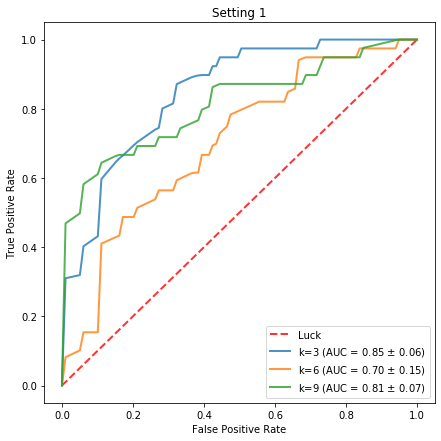

In [11]:
# Setting 1 plotting

setting = ["k=3","k=6","k=9"]
fig3, ax3 = plt.subplots(figsize=(7, 7))    


ax3.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)


for mean_fpr, mean_tpr, mean_auc, std_auc, k in zip(mean_fprs_1, mean_tprs_1, mean_aucs_1, std_aucs_1, setting):
    ax3.plot(mean_fpr, mean_tpr,
             label=r'%s (AUC = %0.2f $\pm$ %0.2f)' % (k, mean_auc, std_auc),
             lw=2, alpha=.8)
    # std_tpr = np.std(tprs, axis=0)
    # tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    # tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    # ax3.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
    #                  label=r'$\pm$ 1 std. dev.')

ax3.set_title("Setting 1")
ax3.set_xlim([-0.05, 1.05])
ax3.set_ylim([-0.05, 1.05])
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
ax3.legend(loc="lower right")
ax3.grid(False)
fig3.show()
fig3.savefig(figdir + "//GA_setting_1_auc.png", dpi=300)

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.

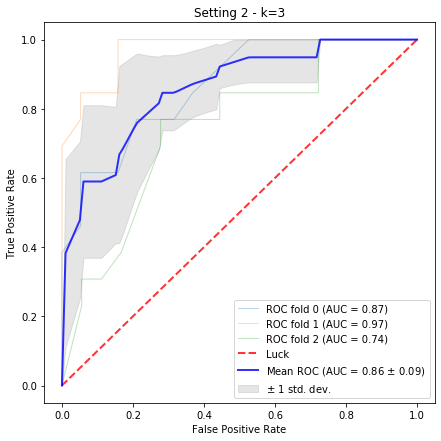

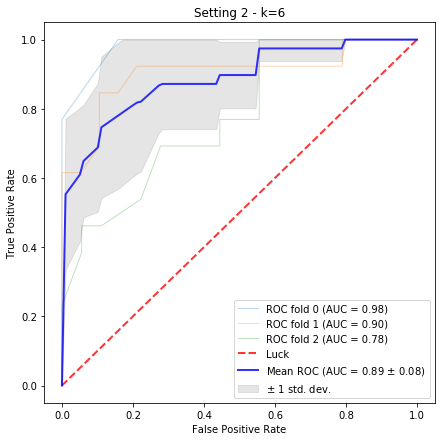

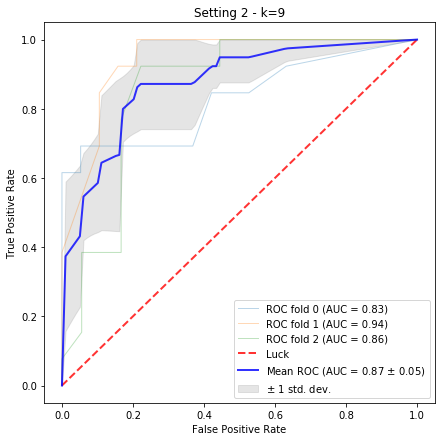

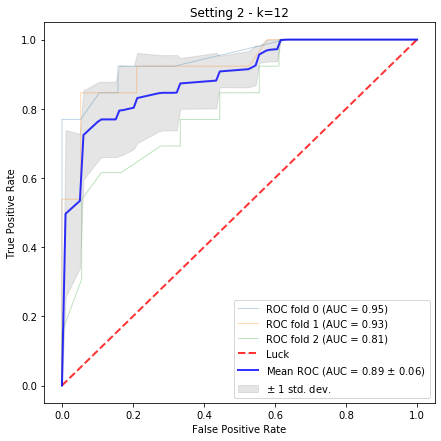

In [12]:
# miRDM-rfGA 
# k= 3,6,9,12
_ind_list = [['hsa-miR-125b-2-3p', 'hsa-miR-29b-1-5p', 'hsa-miR-6738-3p'], # Setting 1
            ['hsa-miR-29b-1-5p', 'hsa-miR-494-3p', 'hsa-miR-668-3p'], # Setting 2
            ['hsa-miR-1307-3p', 'hsa-miR-222-5p', 'hsa-miR-671-5p'], # Setting 3
            ['hsa-let-7b-5p', 'hsa-miR-29b-1-5p', 'hsa-miR-494-3p']] # Setting 4

mean_fprs_2 = []
mean_tprs_2 = []
mean_aucs_2 = []
std_aucs_2 = []
setting = ["k=3","k=6","k=9","k=12"]
for x,title in zip(_ind_list, setting):
    _individual_features = x

    X_T2D, Y_T2D = X, y
    X_T2D = X_T2D.loc[:,_individual_features]
    clf_rf_2 = RandomForestClassifier() # removed on 20190220
    # Run classifier with cross-validation and plot ROC curves

    cv = StratifiedKFold(n_splits=3)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig3, ax3 = plt.subplots(figsize=(7, 7))  

    i = 0
    for train, test in cv.split(X_T2D, Y_T2D):
        probas_ = clf_rf_2.fit(X_T2D.values[train],Y_T2D.values[train]).predict_proba(X_T2D.values[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(Y_T2D.values[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax3.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
 
    ax3.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    ax3.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)


    
    mean_tprs_2.append(mean_tpr)
    mean_fprs_2.append(mean_fpr)
    mean_aucs_2.append(mean_auc)
    std_aucs_2.append(std_auc)
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax3.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    ax3.set_xlim([-0.05, 1.05])
    ax3.set_ylim([-0.05, 1.05])
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('True Positive Rate')
    plt.title("Setting 2 - %s" % title)
    ax3.legend(loc="lower right")
    ax3.grid(False)
#     fig3.show()
    fig3.savefig(figdir + "//GA_setting_2_auc_%s.png" % title, dpi=300)

#     print(_individual_features)


#     importances = clr_rf_2.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in clf_rf_2.estimators_],
#                  axis=0)
#     indices = np.argsort(importances)[::-1][:len(_individual_features)]

#     # Print the feature ranking
#     print("Feature ranking:")

#     #for f in range(x_train.shape[1]):
#     for f in range(len(_individual_features)):
#         print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

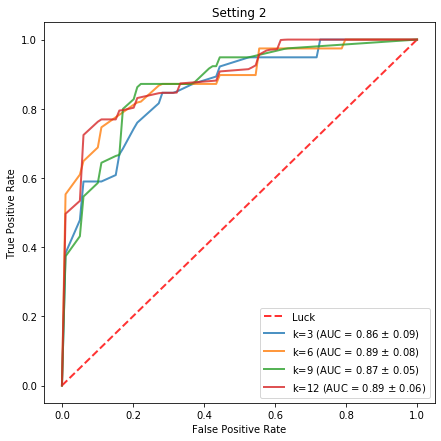

In [13]:
# Setting 2 plotting

fig3, ax3 = plt.subplots(figsize=(7, 7))    

setting = ["k=3","k=6","k=9","k=12"]
ax3.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)


for mean_fpr, mean_tpr, mean_auc, std_auc, k in zip(mean_fprs_2, mean_tprs_2, mean_aucs_2, std_aucs_2, setting):
    ax3.plot(mean_fpr, mean_tpr,
             label=r'%s (AUC = %0.2f $\pm$ %0.2f)' % (k, mean_auc, std_auc),
             lw=2, alpha=.8)
    # std_tpr = np.std(tprs, axis=0)
    # tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    # tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    # ax3.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
    #                  label=r'$\pm$ 1 std. dev.')

ax3.set_title("Setting 2")
ax3.set_xlim([-0.05, 1.05])
ax3.set_ylim([-0.05, 1.05])
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
ax3.legend(loc="lower right")
ax3.grid(False)
# fig3.show()
fig3.savefig(figdir + "//GA_setting_2_auc.png", dpi=300)

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.

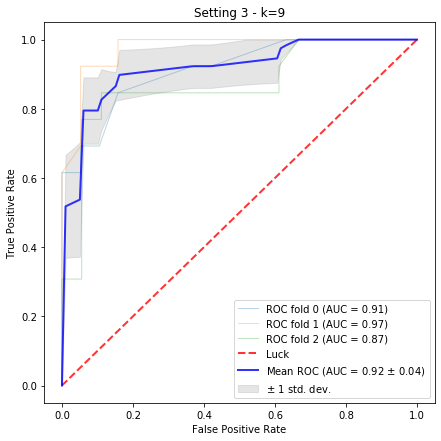

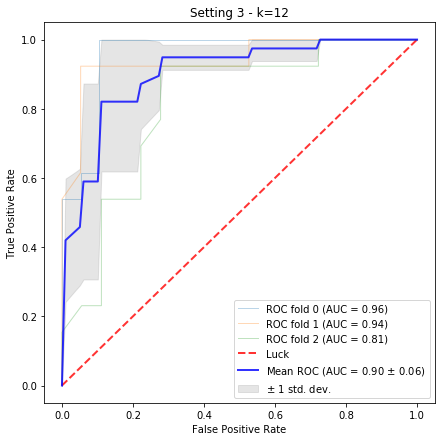

In [14]:
# miRDM-rfGA

# k= 9,12
_ind_list = [['hsa-let-7b-5p', 'hsa-miR-125b-5p', 'hsa-miR-7-5p'], # Setting 5
            ['hsa-let-7b-5p', 'hsa-miR-7-5p', 'hsa-miR-92b-3p']] # Setting 6

mean_fprs_3 = []
mean_tprs_3 = []
mean_aucs_3 = []
std_aucs_3 = []
setting = ["k=9","k=12"]
for x, title in zip(_ind_list, setting):
    _individual_features = x

    X_T2D, Y_T2D = X, y
    X_T2D = X_T2D.loc[:,_individual_features]
    clf_rf_2 = RandomForestClassifier() # removed on 20190220
    # Run classifier with cross-validation and plot ROC curves

    cv = StratifiedKFold(n_splits=3)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig3, ax3 = plt.subplots(figsize=(7, 7))    

    i = 0
    for train, test in cv.split(X_T2D, Y_T2D):
        probas_ = clf_rf_2.fit(X_T2D.values[train],Y_T2D.values[train]).predict_proba(X_T2D.values[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(Y_T2D.values[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax3.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
 
    ax3.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    ax3.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    mean_tprs_3.append(mean_tpr)
    mean_fprs_3.append(mean_fpr)
    mean_aucs_3.append(mean_auc)
    std_aucs_3.append(std_auc)
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax3.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    ax3.set_xlim([-0.05, 1.05])
    ax3.set_ylim([-0.05, 1.05])
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('True Positive Rate')
    plt.title("Setting 3 - %s" % title)
    ax3.legend(loc="lower right")
    ax3.grid(False)
#     fig3.show()
    fig3.savefig(figdir + "//GA_setting_3_auc_%s.png" % title, dpi=300)
    
#     print(_individual_features)


#     importances = clr_rf_2.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in clf_rf_2.estimators_],
#                  axis=0)
#     indices = np.argsort(importances)[::-1][:len(_individual_features)]

#     # Print the feature ranking
#     print("Feature ranking:")

#     #for f in range(x_train.shape[1]):
#     for f in range(len(_individual_features)):
#         print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

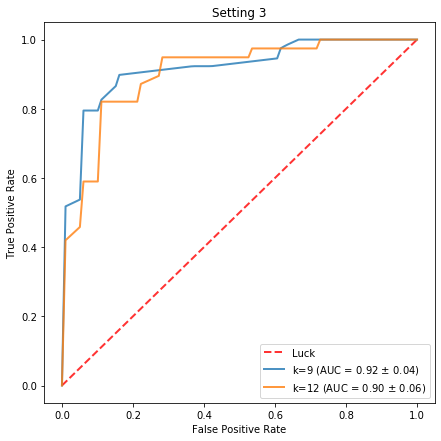

In [15]:
fig3, ax3 = plt.subplots(figsize=(7, 7))    

setting = ["k=9","k=12"]
ax3.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)


for mean_fpr, mean_tpr, mean_auc, std_auc, k in zip(mean_fprs_3, mean_tprs_3, mean_aucs_3, std_aucs_3, setting):
    ax3.plot(mean_fpr, mean_tpr,
             label=r'%s (AUC = %0.2f $\pm$ %0.2f)' % (k, mean_auc, std_auc),
             lw=2, alpha=.8)
#     std_tpr = np.std(tprs, axis=0)
#     tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#     tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#     ax3.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                      label=r'$\pm$ 1 std. dev.')

ax3.set_title("Setting 3")
ax3.set_xlim([-0.05, 1.05])
ax3.set_ylim([-0.05, 1.05])
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
ax3.legend(loc="lower right")
ax3.grid(False)
# fig3.show()
fig3.savefig(figdir + "//GA_setting_3_auc.png", dpi=300)

C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.

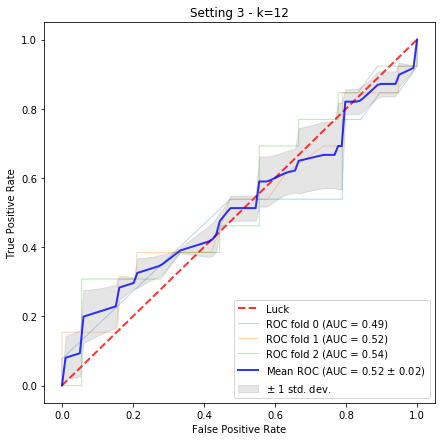

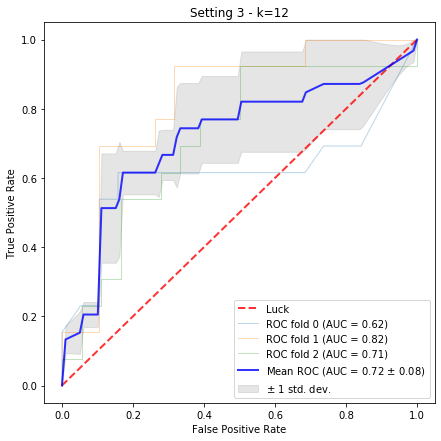

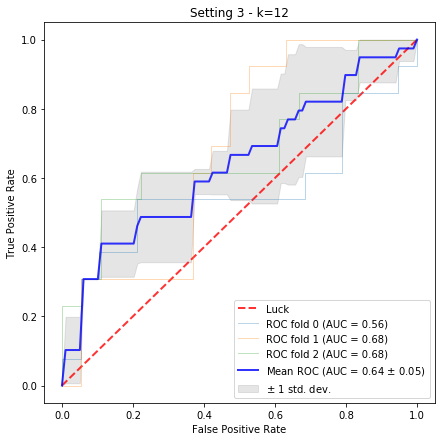

In [20]:
# other feature selection methods

_ind_list = [['hsa-miR-181a-5p', 'hsa-miR-22-3p', 'hsa-miR-92a-3p'], # Setting 9
            ['hsa-miR-1307-3p', 'hsa-miR-6820-5p', 'hsa-miR-29b-2-5p'], # Setting 7
            ['hsa-miR-181a-5p', 'hsa-miR-22-3p', 'hsa-miR-92a-3p']] # Setting 8

mean_fprs_t = []
mean_tprs_t = []
mean_aucs_t = []
std_aucs_t = []
settings = ["Setting 1","Setting 2","Setting 3"]
for x, setting in zip(_ind_list, settings):
    _individual_features = x

    X_T2D, Y_T2D = X, y
    X_T2D = X_T2D.loc[:,_individual_features]
    if setting == "Setting 1":
        clf_rf_2 = RandomForestClassifier() # removed on 20190220
    elif setting == "Setting 2":
        clf_rf_2 = RandomForestClassifier() # removed on 20190220
    elif setting == "Setting 3":
        clf_rf_2 = LogisticRegression(penalty='l1', solver='saga') # removed on 20190220
    # Run classifier with cross-validation and plot ROC curves

    cv = StratifiedKFold(n_splits=3)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig3, ax3 = plt.subplots(figsize=(7, 7))    

    ax3.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

    i = 0
    for train, test in cv.split(X_T2D, Y_T2D):
        probas_ = clf_rf_2.fit(X_T2D.values[train],Y_T2D.values[train]).predict_proba(X_T2D.values[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(Y_T2D.values[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax3.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
 
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    ax3.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    mean_tprs_t.append(mean_tpr)
    mean_fprs_t.append(mean_fpr)
    mean_aucs_t.append(mean_auc)
    std_aucs_t.append(std_auc)
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax3.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    ax3.set_xlim([-0.05, 1.05])
    ax3.set_ylim([-0.05, 1.05])
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('True Positive Rate')
    plt.title("Setting 3 - %s" % title)
    ax3.legend(loc="lower right")
    ax3.grid(False)
#     fig3.show()
    fig3.savefig(figdir + "//TFS_%s_auc.png" % setting, dpi=300)



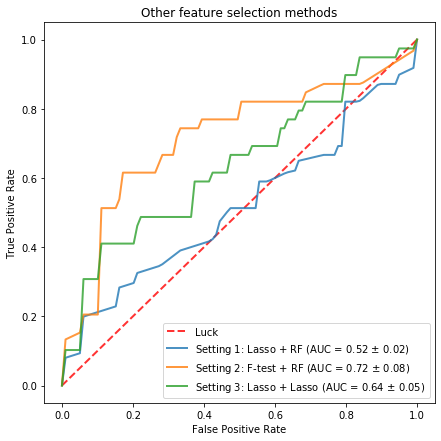

In [21]:
fig3, ax3 = plt.subplots(figsize=(7, 7))    

settings = ["Setting 1: Lasso + RF","Setting 2: F-test + RF","Setting 3: Lasso + Lasso"]
ax3.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)


for mean_fpr, mean_tpr, mean_auc, std_auc, k in zip(mean_fprs_t, mean_tprs_t, mean_aucs_t, std_aucs_t, settings):
    ax3.plot(mean_fpr, mean_tpr,
             label=r'%s (AUC = %0.2f $\pm$ %0.2f)' % (k, mean_auc, std_auc),
             lw=2, alpha=.8)
    # std_tpr = np.std(tprs, axis=0)
    # tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    # tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    # ax3.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
    #                  label=r'$\pm$ 1 std. dev.')

ax3.set_title("Other feature selection methods")
ax3.set_xlim([-0.05, 1.05])
ax3.set_ylim([-0.05, 1.05])
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
ax3.legend(loc="lower right")
ax3.grid(False)
# fig3.show()
fig3.savefig(figdir + "//FS_settings_auc.png", dpi=300)